In [ ]:
"""
Name : Aditya Pradip Kulkarni.

Date : 23/10/2022


Q1 . What are the advantages of a CNN over a fully connected deep neural network for image classification?

Ans : 
        1. In fully connected deep neural network the number of parameters taken into consideration are more as compared to Convolution Neural network. In 
           fully connected neural network a single neuron is fully connected to its precedding neurons and the neurons ahead of it due to which the number of parameters are more.
        2. When compared to fully connected network, in a Convolution neural network the dimensions of data(image data) goes on reducing as the convulition operations are performed.
        3. A CNN is designed in a way that assumes the data fed to it is in form of images which makes it easy to encode the image and later process on it.

Q2. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

Ans : 
      1. Max pooling layer will reduce the number of parameters to be taken for computation from the image data which will reduce the computation cost as well.

Q3. When would you want to add a local response normalization layer?

Ans : 
      1. This layers is useful when working with RELU activation, as they have unbounded activation so in order to normalize them we use local response layer after convolution layer
         to normalize the inputs prior to sending them ahead to activation nodes.

"""


X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_18 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:132: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


937/937 [==============================] - 159s 169ms/step - loss: 0.2028 - accuracy: 0.9362 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 2/5
937/937 [==============================] - 157s 167ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0318 - val_accuracy: 0.9899
Epoch 3/5
937/937 [==============================] - 152s 162ms/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0256 - val_accuracy: 0.9924
Epoch 4/5
937/937 [==============================] - 155s 165ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0206 - val_accuracy: 0.9943
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 0.0258 - accuracy: 0.9911

Test accuracy:  0.991100013256073
313/313 [==============================] - 6s 19ms/step
      Actual                                        Predictions
0          7  [9.866584e-10, 2.1898514e-07, 5.1982417e-05, 1...
1          2  [1.6988574e-08, 2.4531253e-06, 0.9999955, 2.57...
2          1  [4.68002e-06, 0.99979305, 1.59986

'\nQ5. Make comments on your results in step 4. \n\nAns : 1. The validation loss is decreasing so no issue of over-fitting.\n      2. The categorical_crossentropy loss is decreasing across the epocs 1 - 5, at 5th epoch it is 0.0365. Model performs good with accuracy : 0.9891\n      3. The dimensions of the data when data was fed to network to 1st convolution layer : \n      ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n          Conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       \n                                                                 \n          activation_6 (Activation)   (None, 26, 26, 32)        0         \n                                                                 \n          conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      \n                                                                 \n          activation_7 (Activation)   (None, 24, 24, 32)        0         \n                                          

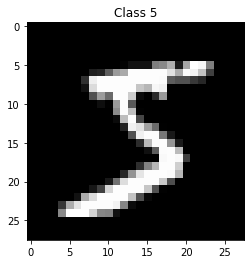

In [4]:
"""
Q4 . Test the code with MNIST data and show model accuracy.

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')



import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)



(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)




plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))



X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape



number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]


# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())

model.add(Activation('softmax'))


model.summary()



model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])



gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()



train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)



# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
 validation_data=test_generator, validation_steps=10000//64)



score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])



redict_x=model.predict(X_test) 

predictions = list(redict_x)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
print(sub)
#sub.to_csv('./output_cnn.csv', index=False)

"""
Q5. Make comments on your results in step 4. 

Ans : 1. The validation loss is decreasing so no issue of over-fitting.
      2. The categorical_crossentropy loss is decreasing across the epocs 1 - 5, at 5th epoch it is 0.0365. Model performs good with accuracy : 0.9891
      3. The dimensions of the data when data was fed to network to 1st convolution layer : 
      ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
          Conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
          activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
          conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
          activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
          max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
          2D)  
      ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++                                                           
          conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
         
          activation_8 (Activation)   (None, 10, 10, 64)        0         
                                                                          
          conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                          
          activation_9 (Activation)   (None, 8, 8, 64)          0         
                                                                          
          max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
          2D)       
          
> > Here the dimensions of the data goes on reducing as the data is processed through the 1st layer of 1st : Conv-Activation-Conv-Batch-normalization-Activation-MaxPooling
    to 2nd : Conv-Activation-Conv-Activation-MaxPooling. This is due to max-pooling layer extracts the required pixels having high value of concentration and its neighbours.                                                    
"""